MEMBERS
1. LOGATHEPAN A/L MUNIYAPPAN [ CA21094 ]
2. AHMAD ZHAFRAN FARUQI BIN ZAINAL ABIDIN [ CB20033 ]
3. IK SHIM A/P EH FHOT [ CA21093 ]
4. MUHAMMAD THAQIYUDDIN BIN MIZAN [ CB20038 ]

#### 1. IMPORT ALL NECESSARY LIBRARIES

In [1]:
# TO LOAD THE DATA
import pandas as pd

# FOR DATA VIZUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns

# FOR FEATURE ENINEERING
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# FOR MODELLING
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier

# FOR EVALUATION
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

import os

In [2]:
# To ignore all the warning messages 
import warnings
warnings.filterwarnings('ignore')

#### 2. LOAD DATA

In [3]:
# The "data_case" data consists of overall monkeypox cases by country
data_case = pd.read_csv("Monkey_Pox_Cases_Worldwide.csv")

# The "data_timeline" data consists of monkeypox cases by time the case was confirmed 
data_timeline = pd.read_csv("Worldwide_Case_Detection_Timeline.csv")

# The "data_country" dataset consists of data of confirmed cases per day starting from 31/01/2022 until 5/8/2022
data_country = pd.read_csv("Daily_Country_Wise_Confirmed_Cases.csv")

#### 3. CHECK DATASET INFO

In [4]:
data_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             110 non-null    object 
 1   Confirmed_Cases     110 non-null    float64
 2   Suspected_Cases     110 non-null    float64
 3   Hospitalized        110 non-null    float64
 4   Travel_History_Yes  110 non-null    float64
 5   Travel_History_No   110 non-null    float64
dtypes: float64(5), object(1)
memory usage: 5.3+ KB


In [5]:
data_timeline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27865 entries, 0 to 27864
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Date_confirmation        27865 non-null  object
 1   Country                  27865 non-null  object
 2   City                     968 non-null    object
 3   Age                      2402 non-null   object
 4   Gender                   1843 non-null   object
 5   Symptoms                 165 non-null    object
 6   Hospitalised (Y/N/NA)    217 non-null    object
 7   Isolated (Y/N/NA)        349 non-null    object
 8   Travel_history (Y/N/NA)  294 non-null    object
dtypes: object(9)
memory usage: 1.9+ MB


In [6]:
data_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 94 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     91 non-null     object
 1   2022-01-31  91 non-null     int64 
 2   2022-02-17  91 non-null     int64 
 3   2022-02-28  91 non-null     int64 
 4   2022-03-04  91 non-null     int64 
 5   2022-03-31  91 non-null     int64 
 6   2022-04-10  91 non-null     int64 
 7   2022-04-12  91 non-null     int64 
 8   2022-04-30  91 non-null     int64 
 9   2022-05-06  91 non-null     int64 
 10  2022-05-08  91 non-null     int64 
 11  2022-05-12  91 non-null     int64 
 12  2022-05-13  91 non-null     int64 
 13  2022-05-15  91 non-null     int64 
 14  2022-05-17  91 non-null     int64 
 15  2022-05-18  91 non-null     int64 
 16  2022-05-19  91 non-null     int64 
 17  2022-05-20  91 non-null     int64 
 18  2022-05-21  91 non-null     int64 
 19  2022-05-23  91 non-null     int64 
 20  2022-05-24  

#### 4. GET DATASET SUMMARY

In [7]:
data_case.describe()

,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
count,110.000000,110.000000,110.000000,110.000000,110.000000
mean,250.800000,21.990909,1.109091,2.163636,0.763636
std,926.844898,201.387185,2.909477,5.094569,3.758604
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,1.000000,0.000000
75%,37.250000,0.000000,1.000000,2.000000,0.000000
max,7084.000000,2103.000000,18.000000,41.000000,34.000000


In [8]:
data_timeline.describe()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
count,27865,27865,968,2402,1843,165,217,349,294
unique,93,91,152,71,5,72,2,1,2
top,2022-07-19,United States,Toronto,20-69,male,genital ulcer lesions,N,Y,Y
freq,1524,7324,329,524,1813,30,117,349,212


In [9]:
data_country.describe()

,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,2022-05-08,...,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,...,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.032967,0.032967,0.010989,0.021978,0.065934,0.043956,0.021978,0.054945,0.010989,0.109890,...,13.978022,9.197802,13.406593,0.934066,1.164835,13.263736,15.758242,7.120879,6.582418,5.439560
std,0.314485,0.314485,0.104828,0.209657,0.628971,0.419314,0.209657,0.524142,0.104828,1.048285,...,103.439943,34.067978,68.368930,8.805052,5.633755,69.139125,69.042554,34.012689,51.176615,38.747963
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,3.000000,1.000000,2.000000,6.000000,4.000000,2.000000,5.000000,1.000000,10.000000,...,981.000000,265.000000,561.000000,84.000000,36.000000,617.000000,516.000000,291.000000,485.000000,365.000000


#### 5. CHECK DATASET NULL VALUES

In [10]:
data_case.isnull().sum()

Country               0
Confirmed_Cases       0
Suspected_Cases       0
Hospitalized          0
Travel_History_Yes    0
Travel_History_No     0
dtype: int64

In [11]:
data_timeline.isnull().sum()

Date_confirmation              0
Country                        0
City                       26897
Age                        25463
Gender                     26022
Symptoms                   27700
Hospitalised (Y/N/NA)      27648
Isolated (Y/N/NA)          27516
Travel_history (Y/N/NA)    27571
dtype: int64

Since we have null value only in data_timeline dataset, we are going to treat this data only.

In [12]:
data_country.isnull().sum()

Country       0
2022-01-31    0
2022-02-17    0
2022-02-28    0
2022-03-04    0
             ..
2022-08-01    0
2022-08-02    0
2022-08-03    0
2022-08-04    0
2022-08-05    0
Length: 94, dtype: int64

#### 6. CLEAN DATASET NULL VALUES

In [13]:
# Drop all the column contains null values and update into new variable
modified_data_timeline = data_timeline.dropna()

In [14]:
# Find the sum of the NULL values in new updated variable
modified_data_timeline.isnull().sum()

Date_confirmation          0
Country                    0
City                       0
Age                        0
Gender                     0
Symptoms                   0
Hospitalised (Y/N/NA)      0
Isolated (Y/N/NA)          0
Travel_history (Y/N/NA)    0
dtype: int64

In [15]:
# Upload the new data into new file called "modified_data_timeline.csv"
modified_data_timeline.to_csv('modified_data_timeline.csv', index=False)

# Read back the data into a new variable
new_data_timeline = pd.read_csv("modified_data_timeline.csv")

In [16]:
# Check for NULL values
new_data_timeline.isnull().sum()

Date_confirmation          0
Country                    0
City                       0
Age                        0
Gender                     0
Symptoms                   0
Hospitalised (Y/N/NA)      0
Isolated (Y/N/NA)          0
Travel_history (Y/N/NA)    0
dtype: int64

#### 7. EXPLORE DATA

###### i. We want to identify the total number of countries involved in the data.

In [17]:
print(f'\n {len(data_case["Country"].unique())} countries are involved in the data.\n')
data_case["Country"].unique()


 110 countries are involved in the data.



array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Som

###### ii. We want to get the the basic idea of  the data via bar plot.

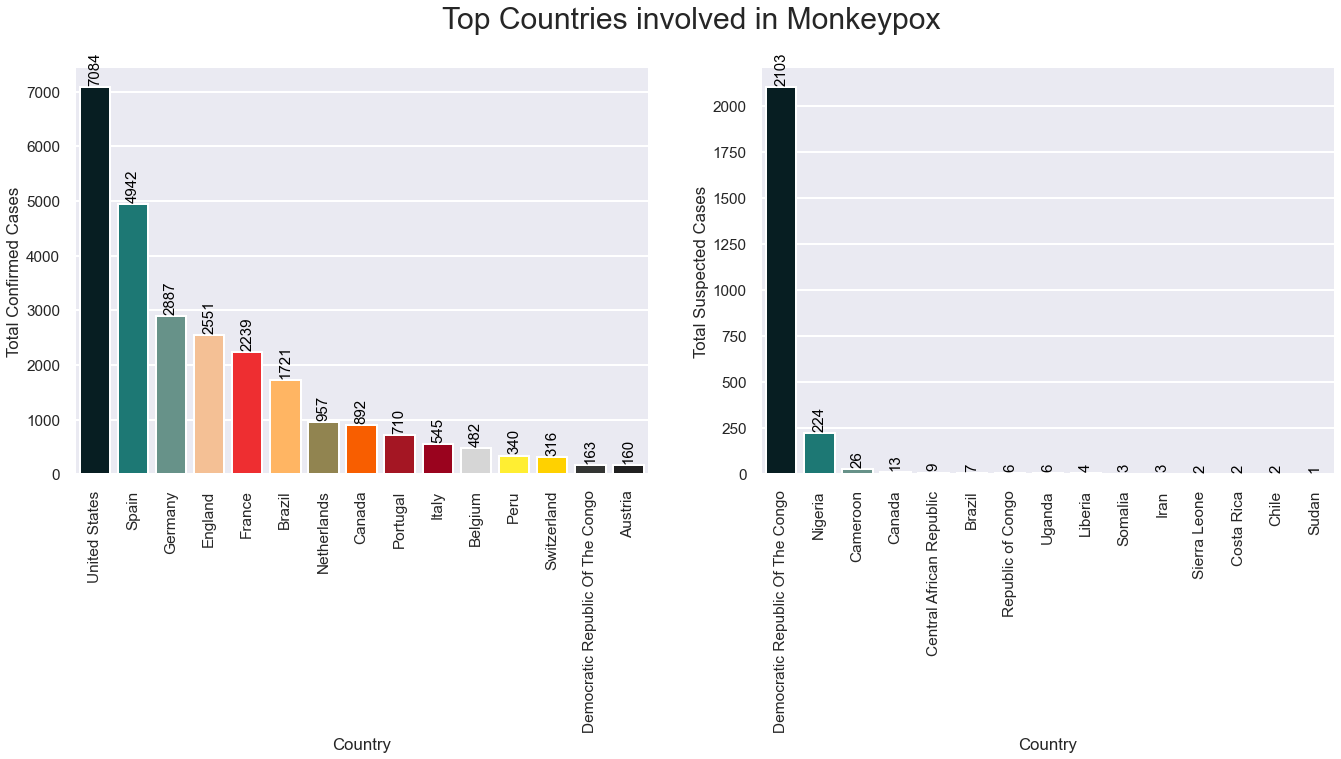

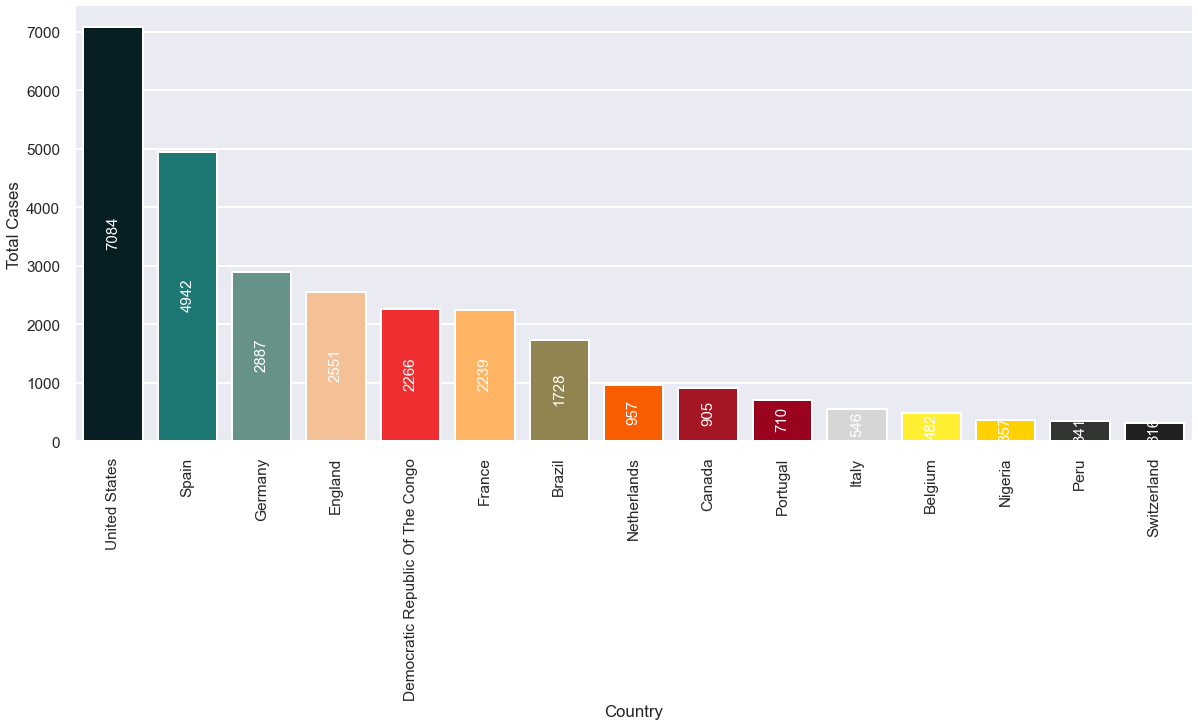

In [18]:
# Set the background style of the bar plot
sns.set_style("darkgrid")
sns.set_context("poster", font_scale=.7)

# Create a custome bar plot palette
palette = ["#071e22","#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

# Transform the dataset into int
data_case[["Confirmed_Cases","Suspected_Cases","Hospitalized","Travel_History_Yes","Travel_History_No"]] = data_case[["Confirmed_Cases","Suspected_Cases","Hospitalized","Travel_History_Yes","Travel_History_No"]].astype("int")
data_case["Total_Cases"] = data_case[["Confirmed_Cases","Suspected_Cases"]].sum(axis=1)

# Divide the dataset into 3 different cases, where each bar plot represents each variable
case_temp1 = data_case.sort_values(["Confirmed_Cases"], ascending=False)
case_temp2 = data_case.sort_values(["Suspected_Cases"], ascending=False)
case_temp3 = data_case.sort_values(["Total_Cases"], ascending=False)

_, axs = plt.subplots(1, 2, figsize=(20,8))
plt.tight_layout(pad=4.0)

# For total confirmed cases
sns.barplot(x=case_temp1["Country"][:15], y=case_temp1["Confirmed_Cases"], ax=axs[0], palette=palette, saturation=1)
axs[0].set_ylabel("Total Confirmed Cases")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=90)
for container in axs[0].containers:
    axs[0].bar_label(container, label_type="edge", padding=2, size=15, color="black", rotation=90)

# For total suspected cases
sns.barplot(x=case_temp2["Country"][:15], y=case_temp2["Suspected_Cases"], ax=axs[1], palette=palette, saturation=1)
axs[1].set_ylabel("Total Suspected Cases")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
for container in axs[1].containers:
    axs[1].bar_label(container, label_type="edge", padding=2, size=15, color="black", rotation=90)    
    
plt.suptitle("Top Countries involved in Monkeypox\n", fontsize=30)
sns.despine(left=True, bottom=True)    
plt.show()

# For total case
plt.subplots(figsize=(20,8))
p = sns.barplot(x=case_temp3["Country"][:15], y=case_temp3["Total_Cases"], palette=palette, saturation=1)
plt.ylabel("Total Cases")
plt.xticks(rotation=90)
for container in p.containers:
    p.bar_label(container, label_type="center", padding=2, size=15, color="white", rotation=90)

sns.despine(left=True, bottom=True)
plt.show()

Based on the bar plots, United States followed by Spain, Germany, and England have the highest number of total cases and confirmed cases, while Democratic Republic of the Congo followed by Nigeria, Cameroon, and Canada have the highest number of total suspected cases. This result suggests that while countries in Africa are champions when it comes to suspected cases, countries with the highest confirmed cases are actually dominated by European countries.

##### iii. Explore the timeline of the monkeypox.

In [19]:
# Change the arrangement of the dataset and construct a timeline graph

data_country.set_index("Country", inplace = True)
timeline = data_country.T
timeline.head(5)

Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,Canada,...,Japan,Guadeloupe,Philippines,Uruguay,Sudan,Bolivia,Montenegro,Cyprus,Lithuania,Guatemala
2022-01-31,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-28,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-04,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-03-31,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


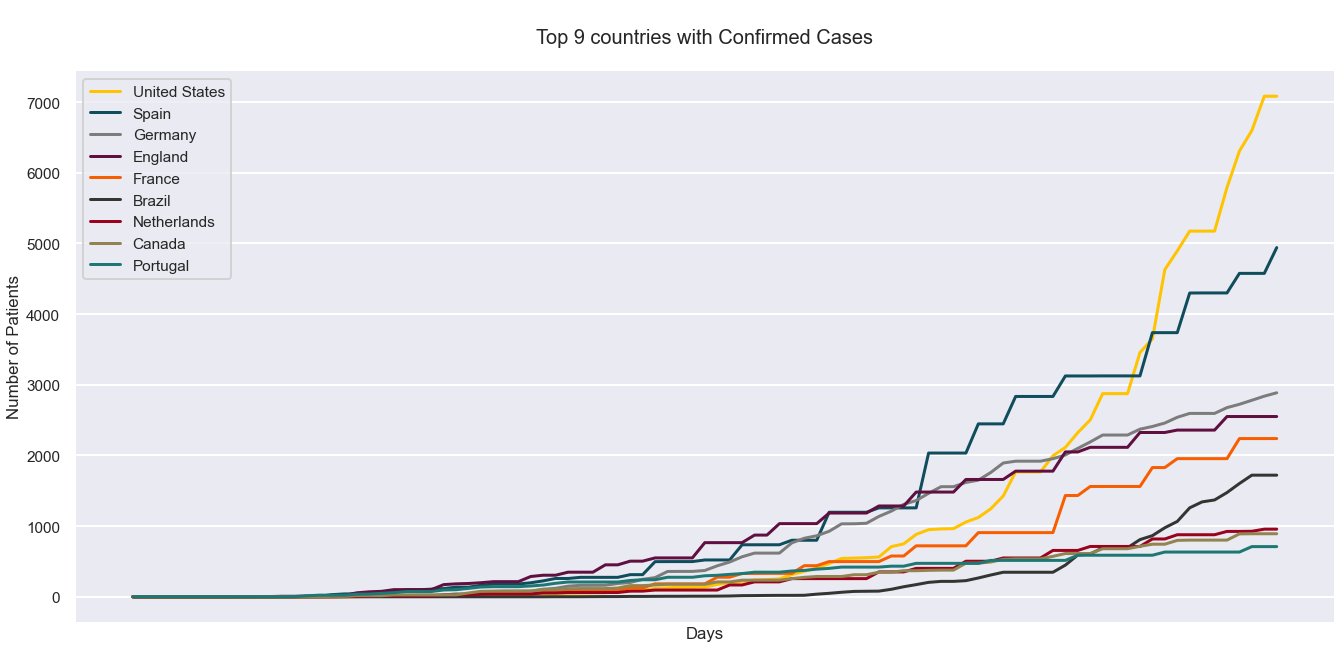

In [20]:
# Construct a timeline, line plot for the top 9 countries in the dataset
_, axs = plt.subplots(figsize=(20,10))
plt.tight_layout(pad=4.0)

sns.lineplot(x=timeline.index, y=timeline["United States"].cumsum(axis=0), data=timeline, ax=axs, color="#FFC300")
sns.lineplot(x=timeline.index, y=timeline["Spain"].cumsum(axis=0), data=timeline, ax=axs, color="#0f4c5c")
sns.lineplot(x=timeline.index, y=timeline["Germany"].cumsum(axis=0), data=timeline, ax=axs, color="#7C7C7C")
sns.lineplot(x=timeline.index, y=timeline["England"].cumsum(axis=0), data=timeline, ax=axs, color="#5f0f40")
sns.lineplot(x=timeline.index, y=timeline["France"].cumsum(axis=0), data=timeline, ax=axs, color="#f85e00")
sns.lineplot(x=timeline.index, y=timeline["Brazil"].cumsum(axis=0), data=timeline, ax=axs, color="#333533")
sns.lineplot(x=timeline.index, y=timeline["Netherlands"].cumsum(axis=0), data=timeline, ax=axs, color="#9a031e")
sns.lineplot(x=timeline.index, y=timeline["Canada"].cumsum(axis=0), data=timeline, ax=axs, color="#918450")
sns.lineplot(x=timeline.index, y=timeline["Portugal"].cumsum(axis=0), data=timeline, ax=axs, color="#1d7874")

axs.set_title("\nTop 9 countries with Confirmed Cases\n", fontsize=20)
axs.set_xlabel("Days")
axs.set_ylabel("Number of Patients")
axs.legend(["United States","Spain","Germany","England","France","Brazil","Netherlands","Canada","Portugal"])
axs.set_xticks([], minor=False)
sns.despine(left=True, bottom=True)
plt.show()

The lineplot above shows that the number of the patients in United States followed by Spain and Germany increases day by day, whereby United States reached a total of more than 7000 patients.


###### iv. Visualizing correlation

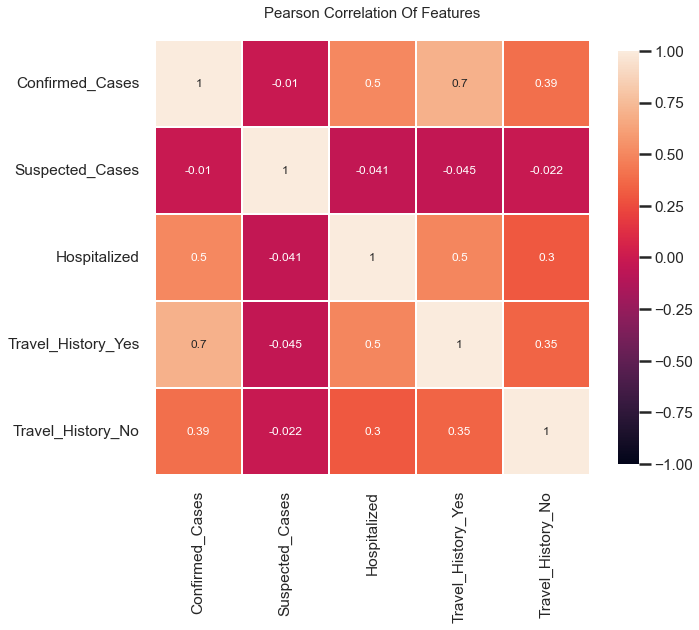

In [21]:
plt.subplots(figsize=(10,8))

sns.heatmap(data_case.drop(columns=["Country","Total_Cases"]).corr(), square=True, cbar_kws=dict(shrink=.95), annot=True, vmin=-1, vmax=1, linewidths=0.1, linecolor='white', annot_kws=dict(fontsize=12))
plt.title("Pearson Correlation Of Features\n", size=15)
plt.xticks(rotation=90)
plt.show()

The Pearson correlation confirms that people with a travel history correlate positively with the confirmed cases and hospitalization. This might be due to the fact that people are more likely to be exposed to the outbreak during travelling.

#### 8. NORMALIZE DATA

#### Normalization
For this normalization, we use data_case dataset since the data has a total number of cases, which makes the model easier to be calculated.

In [22]:
# For the X value, Suspected_Cases, Hospitalized, Travel_History_Yes, Travel_History_No, and Total_Cases are chosen
X = data_case.drop(['Country', 'Confirmed_Cases'], axis=1)

# Confirmed cases are used as y
y = data_case['Confirmed_Cases']

# Test 20% of the data, and train 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# X data before the scaler
X_train.head()

,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Cases
65,0,1,1,0,0
26,1,0,0,0,2
22,0,0,1,0,16
31,0,0,0,0,97
47,0,0,1,0,3


In [24]:
# Scaler is used to standardize the data values into a standard format
scaler = preprocessing.StandardScaler()

new_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
new_x_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [25]:
# X data after the scaler 
new_x_train.head()

,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No,Total_Cases
0,-0.121750,0.022712,-0.196941,-0.180396,-0.257622
1,-0.117282,-0.377027,-0.385320,-0.180396,-0.255570
2,-0.121750,-0.377027,-0.196941,-0.180396,-0.241202
3,-0.121750,-0.377027,-0.385320,-0.180396,-0.158076
4,-0.121750,-0.377027,-0.196941,-0.180396,-0.254543


#### 9. DETERMINE PREDICTION ERROR
For the sake of calculating the accuracy of our model, model errors are calculated.

In [26]:
# This is a function which is created to identify the metric to calculate errors.
# MAE, MSE, MAPE, and R2 are used to calculate the errors.

errors={}
def metric_scores(actual, predicted, name):

    mae = mean_absolute_error(actual, predicted)
    mse = mean_squared_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)
    r2 = r2_score(actual, predicted)
    
    errors[name] = [mae,mse,mape,r2]
    
    print('Mean Absolute Error is {:.3f}'.format(mae))
    print()
    print('Mean Squared Error is {:.3f}'.format(mse))
    print()
    print('Mean Absolute Percentage Error is {:.3f}'.format(mape))
    print()
    print('R Squared Error is {:.3f}'.format(r2))
    print()

#### 10. BUILD MODEL
Linear regression, decision tree regressor, random forest regressor, and k-nearest neighbor are built.

###### i. Linear Regression

Mean Absolute Error is 0.000

Mean Squared Error is 0.000

Mean Absolute Percentage Error is 46.545

R Squared Error is 1.000



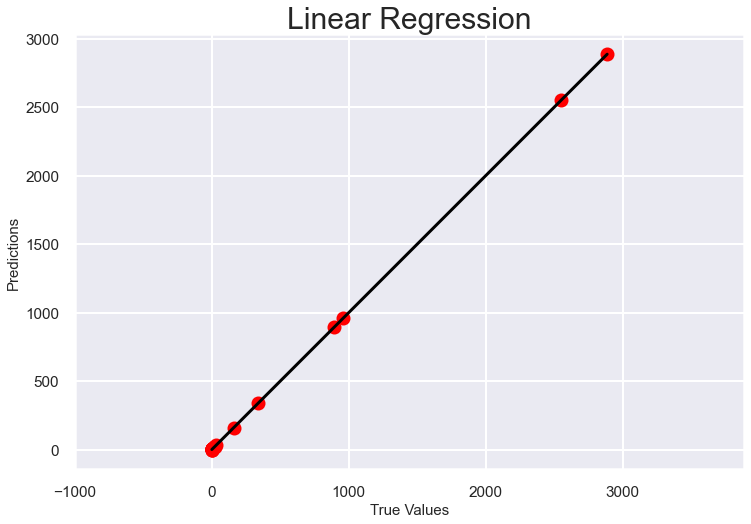

In [27]:
lr = LinearRegression()
lr.fit(new_x_train, y_train)

predicted = lr.predict(new_x_test)
actual = y_test

# To show the error values
metric_scores(actual, predicted, 'Linear Regression')
plt.figure(figsize=(12,8))
plt.scatter(actual, predicted, c='red')

p1 = max(max(predicted), max(actual))
p2 = min(min(predicted), min(actual))

# To customize the plot
plt.plot([p1, p2], [p1, p2], 'black')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.title("Linear Regression", fontsize=30)
plt.axis('equal')
plt.show()

###### ii. Decision Tree Regressor

Mean Absolute Error is 141.091

Mean Squared Error is 151495.727

Mean Absolute Percentage Error is 0.175

R Squared Error is 0.760



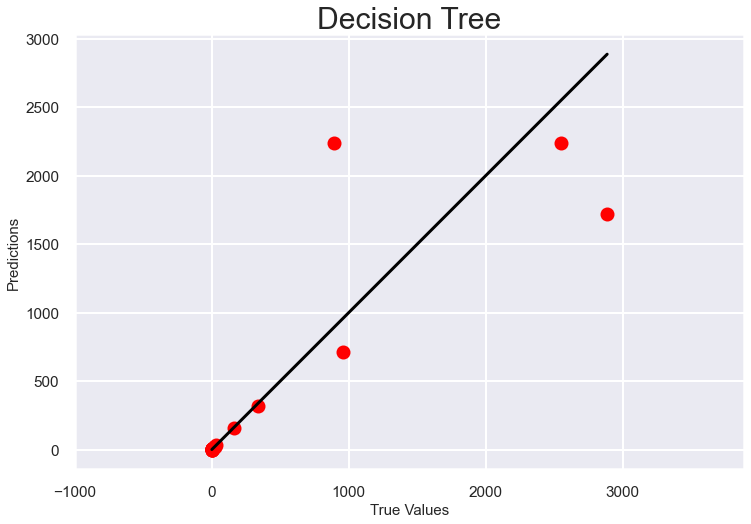

In [28]:
# Random states of 100 are chosen 
DR = DecisionTreeRegressor(random_state=100)
DR.fit(new_x_train, y_train)

predicted = DR.predict(new_x_test)
actual = y_test

# To show the error values
metric_scores(actual, predicted, 'Decision Tree')
plt.figure(figsize=(12,8))
plt.scatter(actual, predicted, c='red')

p1 = max(max(predicted), max(actual))
p2 = min(min(predicted), min(actual))

# To customize the plot
plt.plot([p1, p2], [p1, p2], 'black')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.title("Decision Tree", fontsize=30)
plt.axis('equal')
plt.show()

###### iii. Random Forest Regressor

In [29]:
# The number of trees we want to build before taking the maximum voting or average of predictions is 100
model = RandomForestRegressor(n_estimators=100, verbose=4)
model.fit(new_x_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


RandomForestRegressor(verbose=4)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Mean Absolute Error is 112.862

Mean Squared Error is 76134.265

Mean Absolute Percentage Error is 16376725917711.562

R Squared Error is 0.879



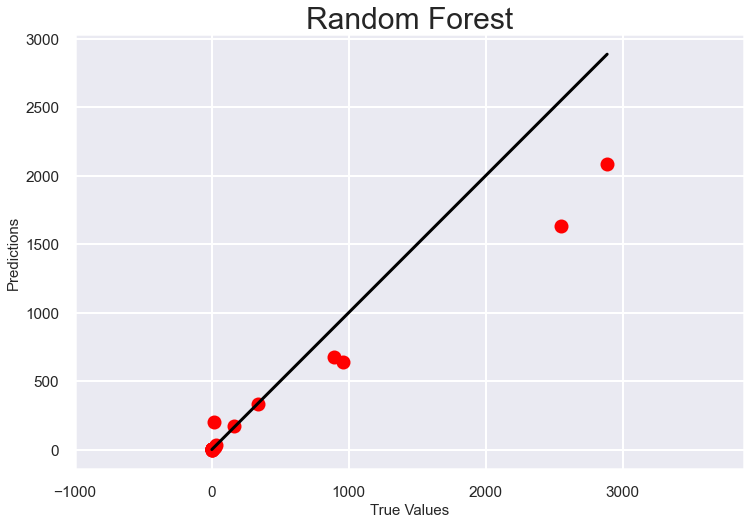

In [30]:
predicted = model.predict(new_x_test)
actual = y_test

# To show the error metrics
metric_scores(actual, predicted, 'Random Forest')
plt.figure(figsize=(12,8))
plt.scatter(actual, predicted, c='red')

p1 = max(max(predicted), max(actual))
p2 = min(min(predicted), min(actual))

# To customize the plot
plt.plot([p1, p2], [p1, p2], 'black')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.title("Random Forest", fontsize=30)
plt.axis('equal')
plt.show()

###### iv. K-Nearest Neighbour

Mean Absolute Error is 182.455

Mean Squared Error is 281438.545

Mean Absolute Percentage Error is 1.199

R Squared Error is 0.553



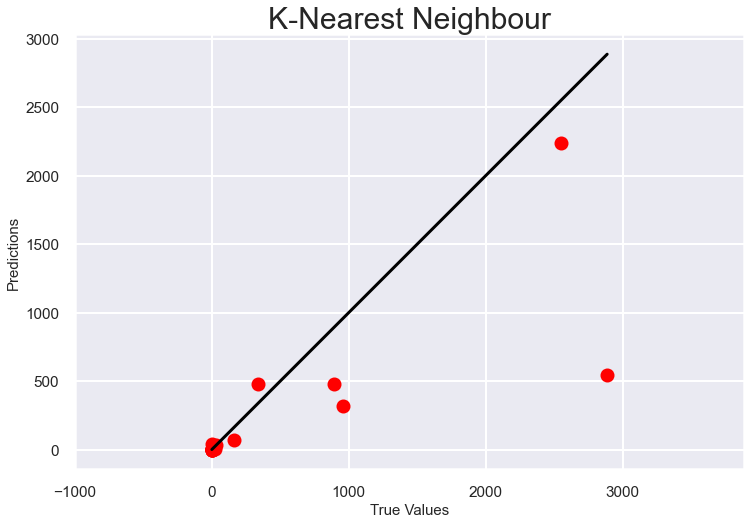

In [31]:
kn = KNeighborsClassifier(n_neighbors=1)
kn.fit(new_x_train, y_train)

predicted = kn.predict(new_x_test)
actual = y_test

# To show the error values
metric_scores(actual, predicted, 'K-Nearest Neighbour')
plt.figure(figsize=(12,8))
plt.scatter(actual, predicted, c='red')

p1 = max(max(predicted), max(actual))
p2 = min(min(predicted), min(actual))

# To customize the plot
plt.plot([p1, p2], [p1, p2], 'black')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.title("K-Nearest Neighbour", fontsize=30)
plt.axis('equal')
plt.show()

#### 11. SUMMARIZE RESULT

In [32]:
## All the error values from 3 of the above models are stored into the data frame
results = pd.DataFrame(errors, index = ['MAE', 'MSE', 'MAPE', 'R2'])
results

,Linear Regression,Decision Tree,Random Forest,K-Nearest Neighbour
MAE,1.576113e-13,141.090909,1.128618e+02,182.454545
MSE,6.381569e-26,151495.727273,7.613427e+04,281438.545455
MAPE,4.654545e+01,0.175215,1.637673e+13,1.199358
R2,1.000000e+00,0.759597,8.791852e-01,0.553395


Based on the error metrics, linear regression is the best model to be developed compared to the Decision Tree, Random Forest and K-Nearest Neighbor since all of its error metrics have the lowest value.